# Импорт необходимых модулей, гугл-диска и наборов данных

In [24]:
import numpy as np  # Модуль высокопроизводительной обработки многомерных массивов (матриц изображений)
import cv2  # Модуль opencv-python (для k-NN)
import matplotlib.pyplot as plt  # Средство визуализации данных и построения графиков
from sklearn.model_selection import train_test_split  # Функция разделения выборки на тренировочную и тестовую
from sklearn import datasets # Наборы данных

# import keras  # Модуль для использования глубокого обучения (нейронных сетей)

In [25]:
from google.colab.patches import cv2_imshow  # Функция отобржаения изображения в Google Colaboratory

# Загрузка изображения с гугл-диска.
from google.colab import drive  # Метод доступа к гугл-диску
drive.mount('/content/gdrive')  # Монтируем гугл-диск
path_to_drive = r"/content/gdrive/My Drive"  # Обязательная часть пути
path_to_folder = path_to_drive + r'/FPK'  # Часть пути, которую выбирает пользователь
path_to_file = path_to_folder + r"/"  # Часть пути, которую выбирает пользователь

ModuleNotFoundError: No module named 'google.colab'

Вспомогательные фукции:

In [20]:
# Функция для подсчета метрик и создния матрицы ошибок
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_metrics_plot_confusion_matrix(clf, y_test, y_pred):
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()

## Датасет  [ирисы Фишера](https://ru.wikipedia.org/wiki/Ирисы_Фишера#Описание).

Данные предаставлены массивом, каждый элемент которого также массив с информацией:

1. Длина наружной доли околоцветника
2. Ширина наружной доли околоцветника
3. Длина внутренней доли околоцветника
4. Ширина внутренней доли околоцветника

Каждому массиву признаков соответствует номер типа цветка (класс 0 или 1 или 2).

In [21]:
# Загрузка набора данных об Ирисах Фишера
from sklearn.datasets import load_iris # Загрузка набора данных

def get_iris():
  iris = datasets.load_iris() # загрузим набор данных ирисов
  x = iris.data # Вход == Набор массивов с 4 числовыми признаками ирисов
  y = iris.target # Указания учителя (один из 3 классов ирисов)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
  return x, y, x_train, x_test, y_train, y_test

x, y, x_train, x_test, y_train, y_test = get_iris()
print(f'{x[:2]=},\n\n{y[:2]=}')  # Посмотрим пару примеров из датасета
print(f'\n{np.unique(y)=}')  # Посмотрим какие уникальные классы есть?
print(f'\nКоличество элементов в выборке:= {len(y)=}')

x[:2]=array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]]),

y[:2]=array([0, 0])

np.unique(y)=array([0, 1, 2])

Количество элементов в выборке:= len(y)=150


В примере `train_test_split(x, y, test_size=0.2, stratify=y)` :

*   `test_size=0.2` означает, что 20 % выборки пойдет в тестовое множество,
*   `stratify=y` означает, что данные в тестовую будут выбираться в такой пропорции, в какой данные распределны в `y`.




# Машинное обучение


Многие методы машинного обучения (**Machine Learning, ML**) реализованы в модуле [scikit-learn](https://scikit-learn.org/)
Рассмотрим **задачи регрессии, классификации и кластеризации данных**.

*   Решение задачи **регресси** позволяет прогнозировать точное (непрерывное) значение функции в по новым входным данных.  
*   В задаче **классификации** решается задача обучения классификатора по имеющимся данным и определения с помощью него класса нового объекта.
*   Задача **кластеризации** состоит в разбиении всей имеющейся выборки на наиболее разделимые подмножества (кластеры).

# Линейная регрессия (Регрессия)

ML модели устанавливают зависимость выходов от входов, т.е. находят правила, как посчитать выход, зная вход. Пусть $y$ $-$ выход, $x$ $-$ вход, $a$ и $b$ $-$ параметры:

\\(y=a*x+b\\)

Часто вход $x$ и выход $y$ $-$ векторы, тогда $A$ $-$ матрица параметров, $b$ $-$ вектор.

$ \overrightarrow{y}=A*\overrightarrow{x}+\overrightarrow{b}, \\ \
где:
\\
\overrightarrow{x} - вектор\ размерности\ N \\
\overrightarrow{y} - вектор\ размерности\ M \\
\overrightarrow{b} - вектор\ размерности\ M \\
A - матрица\ размером\ M*N \\ $

Линейные зависимости легко подсчитать, поэтому линейные модели легко обучать. Однако линейные модели хороши только для данных с почти линейными зависимостями.

## Обучение линейной регрессии. Итерационный метод наименьших квадратов.
Обучение $-$ подбор параметров, минимизирующих ошибки модели. Самый распространенный способ расчета ошибки модели это **метод наименьших квадратов** (МНК). С помощью МНК находятся параметры, которые обеспечивают минимум суммы квадратов расстояний выходов модели от заданных (указаний учителя) на заданных входах.

*Пример.* Пусть заданные выходы: $t(x)={1, 2, 3}$ и модельные выходы: $y(x)={2, 2, 2}$.

Можно посчитать сумму ошибок:

$E = \sum_{i=1}^{N} e(X) = \sum_{i=1}^{N}(y(x)-t(x))= 1-2 + 2-2 + 3-2 = 0.$

При этом ошибки очевидно есть. Применение модуля исправило бы ситуацию, но в таком случае функций перестанет быть непрерывно дифференцируемой.В МНК ошибка расчитывается по формуле:

$ E=\sum_{i=1}^{N} e(x_i)^2=\sum_{i=1}^{N} (y(x_i)-t(x_i))^2\\
x_i : i-ый\ вход\\
t(x_i) : указание\ учителя\\
y(x_i) : выход\ модели\\ $



### Градиентный спуск.
Существуют различные методы нахождения параметов модели, минимизирующих функцию ошибки.

*Например, перебор, но он вычислительно слишком дорог.*

Увеличению значения функции соответствует положительное значение производной. Движение в направлении **антиградиента** (противоположном направлению градиента) соответствет уменьшению значения функции. Эта идея лежит в основе метода **градиентного спуска**, в котором минимизируется функция ошибки: находим вектор градиента и изменяем вектор параметров в направлении антиградиента (т.е. "минус" градиента). Так делаем несколько раз *итеративно* (в цикле).

Пусть на  итерации $t$: $w(t)$ и $E(t)$ - параметр и функция ошибки модели, на этой итерации. $E(t)$ зависит от всех параметров, входов, и указаний учителя, тогда на $t+1$ итерации параметр задается как:

\\(w(t+1)=w(t)-lr*\frac{\partial E(t)}{\partial w}\\)

, где коэффициент $lr$ определяет длину шага изменения параметра ("шаг" обучения, learning rate). Задают его вручную, но есть и методы для автоматического подбора.

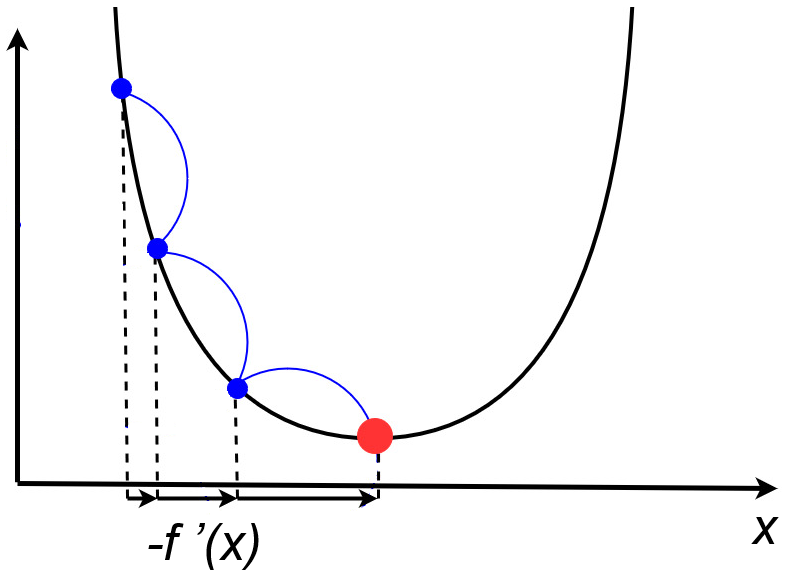

## Пример

По имеющейся последовательности данных: входы $x$ и выходы $y$ восстановить уравнение функции:

$y = ax + b$,

где $a$ и $b\ - $ параметры модели, т.е. необходмио найти значения параметров $a$ и $b$.

Сгенерируем зашумленные данные, похожие на линейную зависимость.


In [26]:
np.random.seed(42) # Инициируем начальное положение генератора псевдослучайных чисел

# Генерация примеров входа (вещественные числа, подчиненные стандартному нормальному распределению):
x = np.random.randn(1, 100)

a, b = 3, 1 # Задаем параметры на время генерации
noise = np.random.randn(1, 100)*0.2 # Шум
y = b + a*x + noise # Примеры выхода

Посмотрим, что получилось:

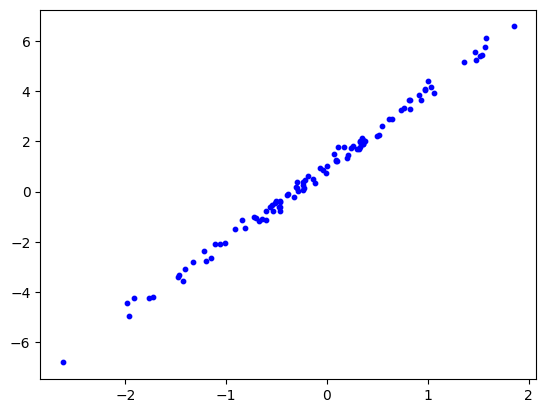

In [27]:
_, ax = plt.subplots()
ax.scatter(x, y, s=10, color='b')

Отделим тренировчные и тестовые данные:

In [28]:
x_train, y_train = x[0][:80], y[0][:80]# обучающие вход и желаемый выход
x_test, y_test = x[0][80:], y[0][80:]# тестовые вход и желаемый выход

### Обучение модели

На каждом шаге итерационного процесса обучения линейной регрессии от текущего значения параметра отнимается величина, зависящая от производной функции ошибки
по этому параметру.
Для начала обучения, необходимо задать начальные значения параметров.Инициализируем параметры случайными числами.

Для применения линейной регрессии зададим начальные значения двух параметров: коэффициент $a$  и смещение $b$.

In [29]:
a = np.random.randn(1)
b = np.random.randn(1)
a, b

(array([0.35778736]), array([0.56078453]))

Для обучения МНК нужно задать гиперпараметры: **шаг обучения** $lr$ и **количество итераций обучения (эпох)** $epochs$

In [30]:
lr = 0.001
epochs = 1000 # количество эпох

ОБУЧЕНИЕ:

In [31]:
Loss = []  # Массив значений функции ошибки
for epoch in range(epochs): # Цикл по количеству эпох
    y_pred = b + a*x_train  # Находим выход модели для всех примеров входов с текущими значениями параметров модели
    error = (y_pred - y_train) # Разность между полученным выходом и тем, который должен был быть

    loss = (error**2).mean() # Средняя квадратчная ошибка
    Loss.append(loss) # Сохраняем значение ошибки в массив
    b_grad = 2 * error.mean() # Производная от loss по параметру b (легко проверить)
    a_grad = 2 * (x_train * error).mean() # Производная от loss по параметру a

    # обучение = изменение параметров
    a = a - lr*a_grad # изменяем параметр a
    b = b - lr*b_grad # изменяем параметр b

    if epoch % 100 == 0 or epoch==epochs-1: # каждые 20 эпох будем
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(epoch, loss, a, b)) # вывод на экран значения функции ошибки

ep:   0  loss: 6.254036   a=0.362  b=0.561
ep: 100  loss: 4.389084   a=0.792  b=0.589
ep: 200  loss: 3.089481   a=1.150  b=0.621
ep: 300  loss: 2.181924   a=1.449  b=0.655
ep: 400  loss: 1.546867   a=1.698  b=0.689
ep: 500  loss: 1.101642   a=1.906  b=0.721
ep: 600  loss: 0.788942   a=2.079  b=0.752
ep: 700  loss: 0.568949   a=2.225  b=0.781
ep: 800  loss: 0.413932   a=2.346  b=0.808
ep: 900  loss: 0.304538   a=2.447  b=0.832
ep: 999  loss: 0.227883   a=2.531  b=0.854


/var/folders/_n/mprkc30d1rj6jyblw653vk_00000gn/T/ipykernel_21653/722983329.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(epoch, loss, a, b)) # вывод на экран значения функции ошибки


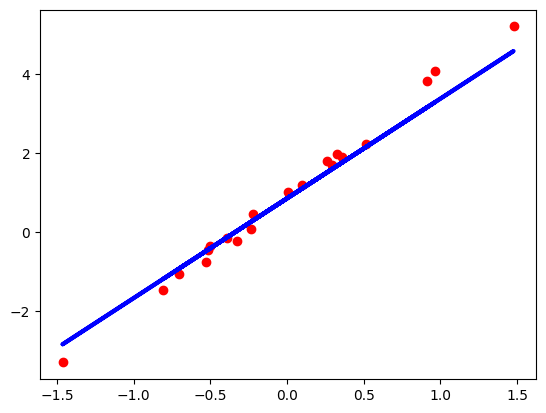

In [32]:
y_test_model = b + a*x_test # Получим выходы модели на тестовых примерах входов

plt.scatter(x_test, y_test,  color='red')  # Истинные тестоые данные
plt.plot(x_test, y_test_model, color='blue', linewidth=3)  # Предсказанные значения
plt.show()

###Модуль sclearn (scikit-learn)

Давайте сделаем тоже самое с помощью библиотеки. Будем использовать библиотеку [`sklearn`](https://scikit-learn.org/stable/) в которой реализовано множество моделей, в том числе и линейная регрессия.  
Cпециальный класс в котором реализован линейная регрессия [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) находится в `sklearn.linear_model`.

Методы работы с моделью линейной регрессии:
* `fit()` $-$  обучение модели. Передается массив примеров входов, массив примеров желаемых выходов (указания учителя) и, возможно, дополнительные аргументы. Создает дополнительно поля `coef_` для хранения множителей **a** и `intercept_` для смещений **b**;
* `predict()` $-$ расчет выходов модели при заданных входах и сохраненных в модели параметрах;
* `score()` $-$ расчет значения функции ошибки на заданных примерах;
* `get_params()`, `set_params()` $-$ методы получения и установки параметров модели.

В методах `sklearn` массив примеров передаются первым аргументом, а признаки - вторым, т.е. для регрессии одномерной величины на 80 примерах, массив примеров должен быть размером 80 на 1.
Если подать массив размера 1 на 80, то программа не выдаст ошибку, но решаться будет не та задача: вместо регрессии одномерной величины на 80 примерах, будет найдена регрессия 80-мерной величины на одном примере.

*Видимо, `sklearn` использует другой метод обучения (на основе решения системы линейных уравнений), а не градиентный спуск, и другую функцию ошибки, но результат такой же. Начальные значения параметров и шаг обучения не задаются.*

Обученные параметры: b=1.0128 a=2.9745


<ipython-input-16-2334b040e888>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Обученные параметры: b=%3.4f a=%3.4f'%(l_reg.intercept_, l_reg.coef_)) #


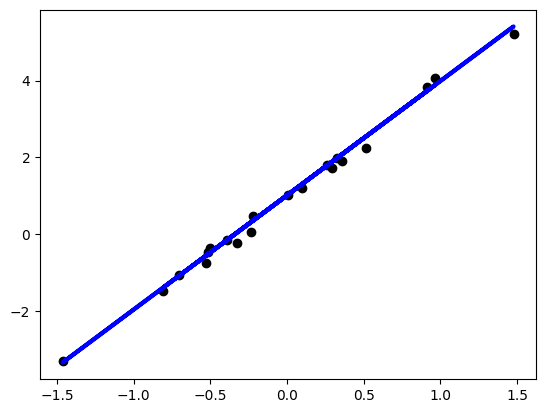

In [ ]:
from sklearn.linear_model import LinearRegression # Импорт модели линейной регрессии
l_reg = LinearRegression() # Создадние модели
l_reg.fit(x_train.reshape(80, 1), y_train.reshape(80, 1)) # обучим модель, принудительно переформатировав размеры массивов
print('Обученные параметры: b=%3.4f a=%3.4f'%(l_reg.intercept_, l_reg.coef_)) #

y_test_pred = l_reg.predict(x_test.reshape(20,1))  # Выход модели на тестовых данных
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.scatter(x_test, y_test,  color='black')
plt.show()

### **Можно ли такую модель применить для классификации?**

# Логистическая регрессия (Классификация)


Логистическая регрессия использует функцию под названием "сигмоида" или "логистическая функция":

 \\(f(x)= \frac{1}{1+e^{-x}}\\).

Функция реализована в модуле  [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html) в функции `expit()`. Построим график ее:

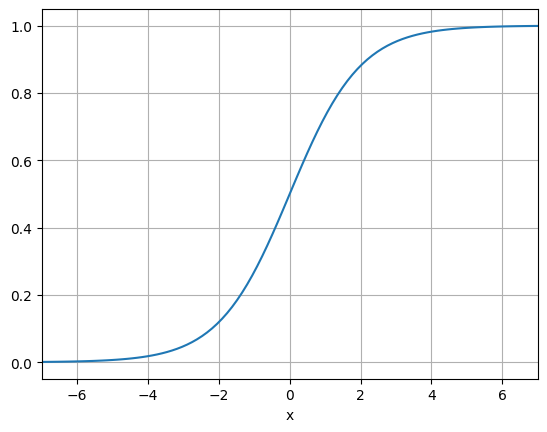

In [ ]:
from scipy.special import expit # Импорт функции
x = np.linspace(-7, 7, 100) # Диапазон значений х
y = expit(x) # Значения функции
plt.plot(x, y) #
plt.grid() #
plt.xlim(-7, 7)#
plt.xlabel('x')#
plt.show()#

Значения этой функции $f(x)\epsilon$ [0; 1], $f(0)=0.5$.
Выход логистической регрессии:

\\(\overrightarrow{y}=f(A*\overrightarrow{x}+\overrightarrow{b})\\),

где сигмоида $f(x)$ применяется поэлементно к вектору.

Рассмотрим бинарную (двухклассовую) классификацию с двумя классами: 0 и 1. Выход логистической регрессии $\epsilon$ [0; 1] можно интерпретировать как уверенность модели в принадлжености входа одному из классов. Выход ближе к 0, значит класс 0, выход ближе к 1, значит класс 1.


В классе [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) реализованы методы аналогичные `LinearRegression()`. Некоторые аргументы:
* `C` - 1/коэффициент важности регуляризуещего члена в функции ошибки, принимает только положительные значения. Малые значения соответсвуют большей регуляризации;
* `penalty` - тип регуляризации, 'none' если хотим отключить регуляризацию (по умолчанию включена L2 регуляризация);
* `tol` - точность, до которой нужно обучать модель;
* `solver` - алгоритм оптимизации;
* `max_iter` - наибольшее допустимое количество итераций обучения.

* Метод `predict()` возвращает классы (0 или 1 в рассматриваемом ниже примере).

Чтобы вернуть выход используем метод `predict_proba()`, который  вернет величины правдоподобия для класса 0 (единица минус выход) и 1 (выход).



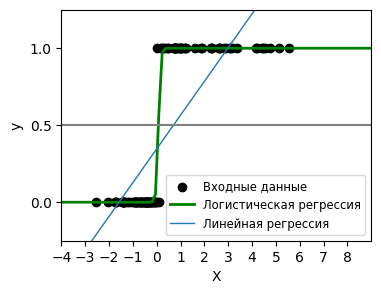

In [ ]:
from sklearn import linear_model
from scipy.special import expit # Сигмоида

# Создадим данные (два отрезка на уровне 0 и 1)
n_samples = 100 # Количество экземпляров
np.random.seed(42) # Начальное значение для генератора случайных чисел
X = np.random.randn(1, n_samples)[0] # Случаные числа
y = (X>0).astype(float) # Экземпляр класса 1, если больше нуля, класс 0 иначе. Преобразуем в вещественные числа (float)
X[X>0] *= 3 # Умножим примеры входов из класса 1 на 3
X += .2 * np.random.normal(size=n_samples) # Добавим шум - небольшие случаные числа

X = X[:, np.newaxis] # Добавление столбца в массив (переход от одномерного к двумерному).

# Обучение классификатора
log_reg = linear_model.LogisticRegression(C=10**5, max_iter=100) # Логистическая регрессия. У аргумента C большое значение -> регуляризация мало влияет на результат
log_reg.fit(X, y) # Обучение модели

# Чёрными точками нарисуем сгенерированные данные
plt.figure(1, figsize=(4, 3))
plt.scatter(X.ravel(), y, color='black') # ravel() вытягивает многомерный массив в одномерный

X_test = np.linspace(-5, 9, 100) #Тестовые примеры входов

# Найдем и нарисуем выход логистческой регрессии линией зеленого цвета
loss = log_reg.predict_proba(X_test[:, np.newaxis])[:,1].ravel() # Второй столбец (индекс 1) содержит предсказанный класс
plt.plot(X_test, loss, color='green', linewidth=2)

# Найдем и нарисуем выход линейной регрессией прямой синего цвета
lin_reg = linear_model.LinearRegression() # Линейная регрессия
lin_reg.fit(X, y) # обучаем ее
plt.plot(X_test, lin_reg.coef_ * X_test + lin_reg.intercept_, linewidth=1) # lin_reg.coef_ == a, lin_reg.intercept_ == b из формулы  y = ax + b,

plt.axhline(.5, color='grey') # Нарисуем линию порога = 0.5 (паралельную оси абсцисс)

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 9))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 9)
plt.legend(('Входные данные', 'Логистическая регрессия', 'Линейная регрессия'), fontsize='small', loc="lower right")
#plt.show() #

# Метод k-ближайших соседей (Классификация)

В англоязычное название k-nearest neighbors algorithm (**k-NN**). Метод состоит в следующем:
* в пространство признаков отображаются заданные объекты (классы которых известны) и новый объект (класс которого нужно установить),
* задается количество k объектов-соседей для анализа,
* в качестве класса нового объекта выбирается тот класс, которому принадлежит наибольшее количество из k объектов-соседей.
На рисунке ниже  проиллюстрирован метод k-ближайших соседей  10.1, на котором новому объекту (круг) в случае выбора k = 3 ближайших соседей будет назначен класс «квадрат», если же выбрать k = 11, то будет назначен класс «треугольник».


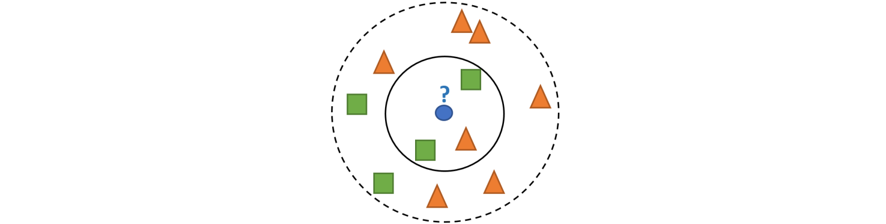

В случае бинарной классификации лучше брать в качестве k нечетное число. Рассмотрим на примере. Зададим случайные координаты для 40 точек на плоскости, каждой из которых сопоставим класс 0 (треугольник) или 1 (квадрат):

In [ ]:
data = np.random.randint(0,40,(40,2)).astype(np.float32)
classes = np.random.randint(0,2,(40,1)).astype(np.float32)

# Класс 0 - треугольник
triangles = data[classes.ravel()==0]

# Класс 1 - квадрат
squares = data[classes.ravel()==1]

Зададим координаты новой точки (круг на рисунке), которую необходимо классифицировать:

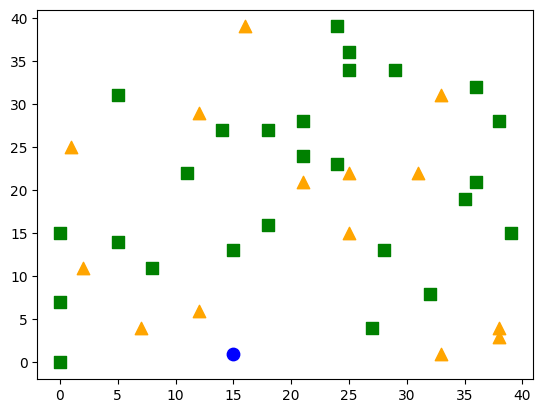

In [ ]:
new_point = np.random.randint(0,40,(1,2)).astype(np.float32)

plt.scatter(triangles[:,0], triangles[:,1], 80, 'orange', '^')
plt.scatter(squares[:,0], squares[:,1], 80, 'g', 's')
plt.scatter(new_point[:,0], new_point[:,1], 80, 'b', 'o')

Применим k-NN, выбрав k = 3:

In [ ]:
knn = cv2.ml.KNearest_create()  # Инициализация метода
knn.train(data, cv2.ml.ROW_SAMPLE, classes)  # Обучение метода

_, result, neighbours, dist = knn.findNearest(new_point, 3)  # классификация новой точки

print("Выбран класс : ", result)
print("Классы соседних объектов: ", neighbours)
print("Расстояние до соседних объектов: ", dist)

Выбран класс :  [[0.]]
Классы соседних объектов:  [[0. 0. 1.]]
Расстояние до соседних объектов:  [[ 34.  73. 144.]]


## Задача распознавания рукописных цифр

Импортируем набор изображений 28×28 пикселей 10 классов рукописных цифр (0, 1, 2, …, 9), в котором содержится 60 000 изображений для обучения и 10 000 изображений для тестирования:

In [ ]:
from keras.datasets import  mnist
(train, train_labels), (test, test_labels) = mnist.load_data()  # Получаем триенировочные и тестовые данные вместе с их метками

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Выведемпервые 5 изображений тренировочной выборки
[cv2_imshow(train[_]) for _ in range(5)]

[None, None, None, None, None]

Выберем первые 5 000 изображений для обучения. Матрицу каждого изображения тренировочной и тестовй вборки преобразеум одномерный массив:

In [ ]:
train_d = train[:5000].reshape(5000, 28*28).astype(np.float32)
test_d = test.reshape(10000, 28*28).astype(np.float32)
train_labels = train_labels[:5000].astype(np.int64)
test_labels = test_labels.astype(np.int64)

In [ ]:
train_d[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Обучим и протестируем классификатор:

In [ ]:
knn = cv2.ml.KNearest_create() # Инициализируем классификатор

knn.train(train_d, cv2.ml.ROW_SAMPLE, train_labels) # Обучение

_, res, _, _ = knn.findNearest(test_d, k=3) # Тестирование

Получение точности классификации:

In [ ]:
res = np.array([i[0] for i in res])

accuracy = np.count_nonzero(res==test_labels)*100.0/res.size

print("Точность:", accuracy)

Точность: 93.39


# Метод опорных векторов. Support vector machine (SVM)

Результатом применения метода является нахождение гиперплоскости, которая в наибольшей степени разделяет объекты разных классов.

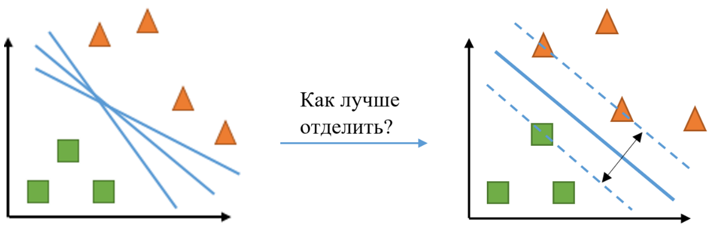

В модуле [sklearn.svm](https://scikit-learn.org/stable/api/sklearn.svm.html) реализованы, в том числе методы:

*   для классифкаиции LinearSVC (Linear Support Vector Classification) .
*   для регрессии LinearSVR (Linear Support Vector Regression).

Некоторые аргументы LinearSVC:

* `C` — параметр регуляризации, степень регяризации = 1/C по умолчанию 1.0
* `penalty` — тип нормировка при штрафах `l1` или `l2`, по умолчанию `l2`
* `tol` — допустимая степень близости к критерию остановки для остановки float, по умолчанию 0.0001
* `class_weight` — веса классов, по умолчанию `None`:
  * `None` — все классы имеют один вес,
  * 'balanced' — веса классов обратно пропорциональны частоте их вхождения в выборку,
  * словарем можно задать веса конкретных классов.
* `max_iter` — максимально допустимое количество итераций.
* `verbose` — степень отображения результатов, по умолчанию 0
* `random_state` — начальное состояние генератора, по умолчанию не задано (None)








[LibLinear]              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


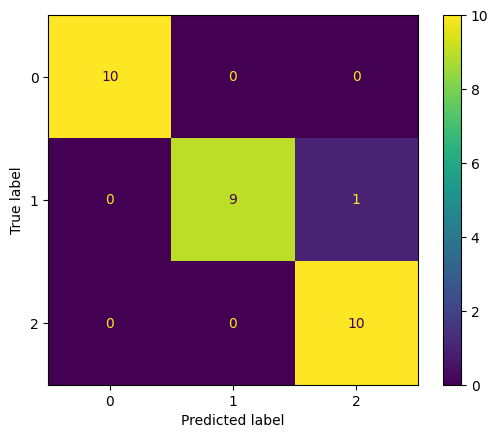

In [ ]:
from sklearn.svm import LinearSVC

# Разделяем на признаки и объекты
x, y, x_train, x_test, y_train, y_test = get_iris()

# Инициализируем  классификатор, обучаем и тестируем
clf = LinearSVC(penalty='l2', verbose=50, random_state=42, class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

# Дерево принятия решений (Классифиакция)

*Пример* системы правил кредитной организации для приняти решения о выдаче/отказе в выдаче кредита:

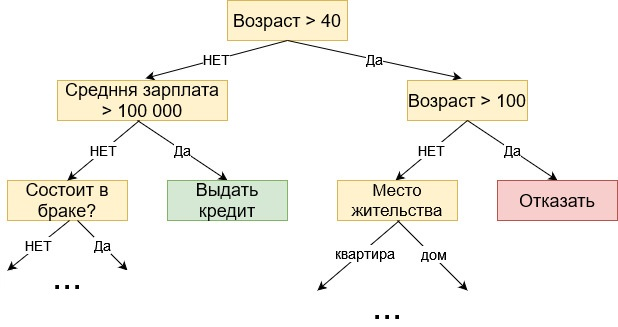

Иерархия такой системы правил напоминают изображение перевернутого корнем вверх дерева, отсюда и название $-$ **дерево принятия решений**. Дерево включает в себя места разветвления $-$ **узлы**, корневую вершину (**корень**), **листья** и **ветки**. В узлах указаны признаки для принятия решения, значения признаков указаны на ветвях, в листьях указаны итоговые.

Деревья могут быть разной структуры, но мы рассмотрим деревьях только с ответами типа "ДА\НЕТ".

## Обучение (создание) дерева



Существуют различные методы обучения деревьев, рассмотрим один из них $-$ метод ["CART"](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms) (Classification and Regression Trees) из `sklearn`. Суть которого в том, чтобы в каждом узле выбрать признак и пороговое значение, которые позволяют максимально эффиективно разделить экземпляры разных классов, т.е. так чтобы экземпляры одного класса попадали только в свою ветку и не попадали в ветку другого класса.

Рассмотрим набор из $L$ обучающих векторов примеров входов \\(x^l\\) с $n$ компонентами (атрибутами) каждый и $L$ меток $y$ класса, к которым относится каждый из примеров. Используем правила с ответами ДА/НЕТ и условия вида \\(x_i^l \leq t_i\\),  $t$ $-$ пороговые значения атрибутов.

В каждом узле дерева используем один из атрибутов (компонент входа) и сраваем его с пороговым значением. Все обучающие примеры $node$ этого узла делим на две части: в первую $node\_l$ (левую) войдут примеры у которых условие \\(x_i^l \leq t_i\\) выполняется, а во вторую $node\_r$ (правую) $-$ остальные примеры.

Найдем для этих двух выборок величину *неопределенность* $H()$ (разннообразие, impurity, загрязненность, неточность, критерий) и общую неопределенность узла

$G$ = (число примеров в $node_l$)/(число примеров в $node$)* $H(node\_l) +$

(число примеров в $node_r)/($число примеров в $node$)* $H(node_r).$

Последнее выполним для всех атрибутов и всех возможных значений порога этих атрибутов. Найдем атрибут и порог, для которых G минимально. По ним и будем окончательно строить узел.

Начав с корня (через которых прохожят все обучающие примеры \\(x^l\\)), создавются новые узлы, постепенно разделяя набор обучающих примеров на меньшие части по атрибутам и порогам до тех пор, пока не останется в каждом узле по одному примеру. Также возможно выполнение других заданных критерии остановки обучения.

В результате получаем дерево решений.

Существуют различные спосорбы расчета критерия *H()*. При выборе критерия необходимо учесть, что критерий должен равен маленькму числу, если за одно разделение отделились классы полностью (идеальное разделение) и большое, если колчиство примеров разного класса в разделенных множествах примерно одинаково (бесполезное разделение). Примеры критериев:

I) в задаче классификации на $K$ классов:

1) *Неопределенность Джини*: для каждого класса считаем долю $p$ примеров этого класса во всех примерах $N_m$ узла $m$, метки класса $y$ $\epsilon \{0, 1, ..., K-1\}$, и находим $H()$:

$ p_k=\frac{1}{N_m}* \sum_{x_i \in node\_m} I(y_i=k),$

где функуия $I=1$ если $y_i$ и $k$ совпадают, $I=0$ если не совпадают
$H = \sum_{k} p_k*(1-p_k) \\ $

2) *Энтропия*:

$ H = - \sum_{k} p_k*log(p_k) \\ $

3) *Ошибка классификации*:

$ H = 1-max(p_k) \\ $

II) В регрессии обычно используют среднеквадратичную ошибку, для этого находят среднее значение меток $y$ в примерах узла $m$

$ y_{mean} = \frac{1}{N_m} \sum_{i\in N_m} y_i \\ $

после находят среднеквадратичную ошибку

$ H =  \frac{1}{N_m} \sum_{i\in N_m} (y_i-y_{mean})^2 \\ $

[Анимация создания дерева](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).



В библиотеке `sklearn` модуль `tree` содержит функции для деревьев, в том числе  [`DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) для создания классификатора. Команды:

* `fit()` для обучения,
* `predict()` для расчета выходов,
* `plot_tree()` для отображения дерева


In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Задача.
На примере данных с банка построить классификатор, котрый разделяет заёмщиков на "надежных" (можно выдать кредит, *класс 1*) и ненадежных (не следует выдать кредит, *класс 0*).

 О заёмщике известно:

*   уровень заработкной платы $x0\ \epsilon\ \{0,1, ..., 100\}$ у.е. в мес,
*   класс места проживания $x1\ \epsilon\ \{0,1, ..., 7\}$ (0 - самое недогрогое жилье, 7 - самое дорогое жилье)

Генерируем данные:

In [10]:
np.random.seed(42) # Начальное значение для генератора случайных чисел
n_samples = 100 # Количество экземпляров
max_x0 = 100
max_x1 = 8
cl_0 = 0 # Класс. Нужно задавать целым числом, строкой нельзя
cl_1 = 1 # Класс. Нужно задавать целым числом, строкой нельзя

# Тренировочная выборка:
n_classes = 2  # Количество классов

# Экземляры класса 0
x0 = np.random.randint(0, max_x0//2+8, n_samples).astype('float')
x1 = np.random.randint(0, max_x1, n_samples).astype('float')
data_0 = list(zip(x0, x1))

# Экземляры класса 1
x0 = np.random.randint(max_x0//2-7, max_x0, n_samples).astype('float')
x1 = np.random.randint(3, max_x1, n_samples).astype('float')
data_1 = list(zip(x0, x1))

x = np.array(data_0 + data_1)  # Даныне
y = np.array([cl_0 for _ in range(len(data_0))] + [cl_1 for _ in range(len(data_1))])  # Метки классов
# print(x.shape, y.shape)

# Деление на обучающую и тестовую выборки:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Обучение
clf = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train) # Обучаем дерево
tree.plot_tree(clf, fontsize=10, max_depth=3, feature_names=['x0', 'x1'])


print('Важность признаков: ', clf.feature_importances_)

NameError: name 'train_test_split' is not defined

Библиотека [`graphviz`](https://graphviz.org/) позволяет отображать и сохранять деревья в специальном формате *DOT*. Библиотеку на локальном комьютере следует устанавливать отдельно. В *Google Colaboratory* она установлена.


In [2]:
import graphviz

In [11]:
# Увеличим максимальную глубину дерева
clf = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train) # Обучаем дерево на текущей паре атрибутов

new_graph = tree.export_graphviz(clf,
                     out_file=None,  # Можно указать файл для сохранения изображения
                     class_names=['class_0', 'class_1'],   # Названия классов
                     filled=True, rounded=True, special_characters=True) # Детали отображения

graph = graphviz.Source(new_graph)  # Создаем представление graphviz
graph  # Вывод на экран

NameError: name 'x_train' is not defined

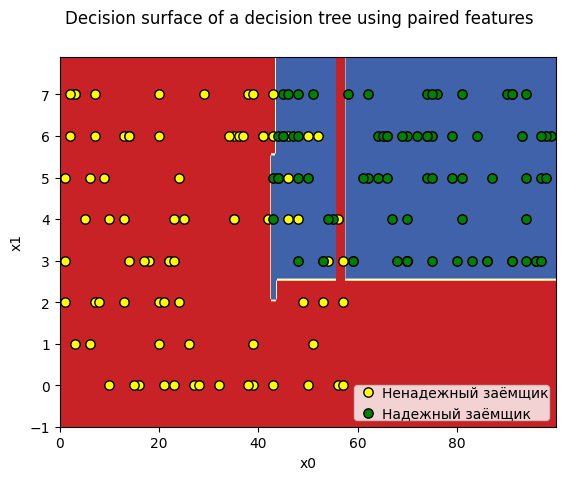

In [ ]:
classes = ['Ненадежный заёмщик', 'Надежный заёмщик']
colors = ['yellow', 'green']  # Цвета отображения точек
plot_step = 0.1 # Шаг расчета узлов на плоскости

# --- Блок кода для отрисовки разделения плоскости на два класса и разделяющей поверхности (контура)
# Измененим минимальные и максимальные значения атрибутов
x0_min, x0_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1

# Созадем прямоугольную сетку всех возможных значений атрибутов x0 и x1 с шагом plot_step
xx_0, xx_1 = np.meshgrid(np.arange(x0_min, x0_max, plot_step),
                         np.arange(x1_min, x1_max, plot_step))

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5) # Параметры обеспечивают компактный вид

# Находим выход классификатора для всех узлов сетки, не забыв что
# нужно преобразовать массивы к некоторому размеру
Z = clf.predict(np.c_[xx_0.ravel(), xx_1.ravel()])
Z = Z.reshape(xx_0.shape) # Преобразование обратно к исходному размеру

cs = plt.contourf(xx_0, xx_1, Z, cmap=plt.cm.RdYlBu) # Рисуем контур
plt.xlabel('x0'); plt.ylabel('x1')  # Подписи осей
# ---

# Отображаем обучающие примеры своим цветом
for i, color in zip(range(n_classes), colors): # В цикле по количеству классов
    idx = np.where(y_train == i) # Выбираем точки класса i
    # отображаем их своим цветом
    plt.scatter(x_train[idx, 0], x_train[idx, 1], c=color,
                label=classes[i], edgecolor='black', s=45)

plt.suptitle("Decision surface of a decision tree using paired features") # Подписываем график
plt.legend(loc='lower right', borderpad=0, handletextpad=0) # Легенда
plt.axis("tight"); # отображение осей

Протестируем обученный классификатор в задаче определения надежности/ненадежности заемщиков на тестовой выборке:

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.76      0.95      0.84        20

    accuracy                           0.82        40
   macro avg       0.85      0.82      0.82        40
weighted avg       0.85      0.82      0.82        40



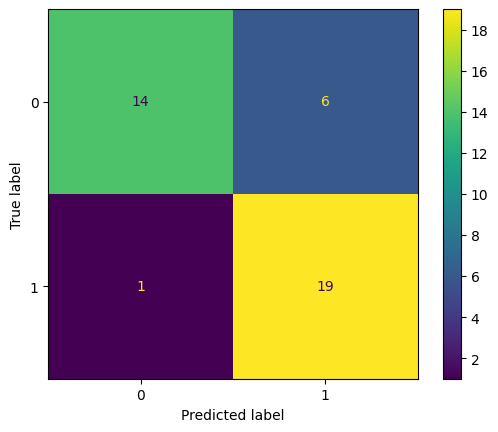

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict_proba(x_test).argmax(axis=1)
#print('Accuracy: ', accuracy_score(y_test, y_pred))
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

# Случайный лес. Random Forest. RF (Классифиакция)

Как можно улучшить работу (увеличить метрики работы) дерева принятия решения?

1. **Создавать более глубокое дерево**. Тогда его слишком долго "обсчитывать" и теряется обобщающая способность.
2. **Создать много неглубоких деревьев** и применить голосование "по большинству". Если 90% деревьев выбрали один и тот же класс, то можно поверить "большинству"

Много случайно созданных деревьев образуют **случайный лес**.


Случайный лес для классификации в`sklearn` реализован в классе [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) модуля `ensemble`.

Аргументы:

---
* `n_estimators` - количество деревьев в лесу, по умолчанию 100.
* `criterion` - критерий качества разделения в узле: критерий Джини `gini` (по умолчанию) или энтропия `entropy`.
* `max_depth` - наибольшая допустимая глубина дерева (по умолчанию неограничена).
* `max_features` – число признаков, по которым ищется разбиение. Можно указать конкретное число или % или выбрать из: None (все признаки), "sqrt" (max_features=корень(количество признаков)), "log2" (max_features=log2(количество признаков)), по умолчанию "sqrt".
* `class_weight` – вес каждого класса (по умолчанию все веса = 1), можно передать словарь с весами, или указать "balanced" (веса классов равны их исходным частям в выборке) или указать "balanced_subsample" (веса на каждой подвыборке будут соотвествуют распределению классов на этой подвыборке).
* `n_jobs` – количество используемых ядер процессора, по умолчанию 1, если -1, то будут использоваться все ядра.
---

* `min_samples_split` – минимальное количество объектов, необходимое для разделения внутреннего узла (по умолчанию 2).
* `min_samples_leaf` – минимальное количество объектов в листе (по умолчанию 1).
* `min_weight_fraction_leaf` – минимальная взвешенная доля от общей суммы весов от всех примеров, которая должна быть в листе, по умолчанию 1.
* `max_leaf_nodes` –  максимальное количество листьев (по умлчанию нет ограничений).
* `bootstrap` – применять ли бустрэп при построении дерева, по умолчанию `True`.
* `max_samples` - если `bootstrap=True` наибольшее количество примеров для одного дерева (примеры выбираются случайно).
* `random_state` – стартовое состояние генератора случайных чисел .
* `verbose` – количество выводимой информации при работе с деревьями (по дефолту 0).
* **др.**

Атрибуты `RandomForestClassifier`:
* `estimators_` - список объектов деревьев (типа `DecisionTreeClassifier`) в этом лесу
* `classes_` - метки классов
* `n_classes_` - количество классов
* `n_features_` - количество атрибутов
* `n_outputs_` - количество выходов
* [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) - оценка **важности** атрибутов, которая показывает вклад атрибута в точность решения задачи.

Реализованы методы:
* `fit()` - обучение леса
* `apply()` - применение деревьев и расчет индексов листьев
* `predict()` - расчет класса для заданного примера
* `decision_path()` - возвращает конкретный путь принятия решения по лесу
* `score()` - расчет средней точности классификатора для заданных примеров
* др.




  

In [ ]:
# Классификатор на основе случайного леса. Можно изменять значения рагументов или добавлять новые
from sklearn.ensemble import RandomForestClassifier # Cлучайный лес
clf = RandomForestClassifier(n_estimators=150,
                             max_depth=10,
                             max_features=2)
clf.fit(x_train, y_train) # Обучение
y_pred = clf.predict(x_test) # Тестирование
score=clf.score(x_test, y_test) # Средняя точность
print('Средняя точность =', score)

Средняя точность = 0.875


Точность не достигла 1, т.к. неверно был определене класс в некотрых примерах входных тестовых данных. Из рисунка ниже ясно, что деревья разделяют всю выборку. Посомтрим одно дерево:

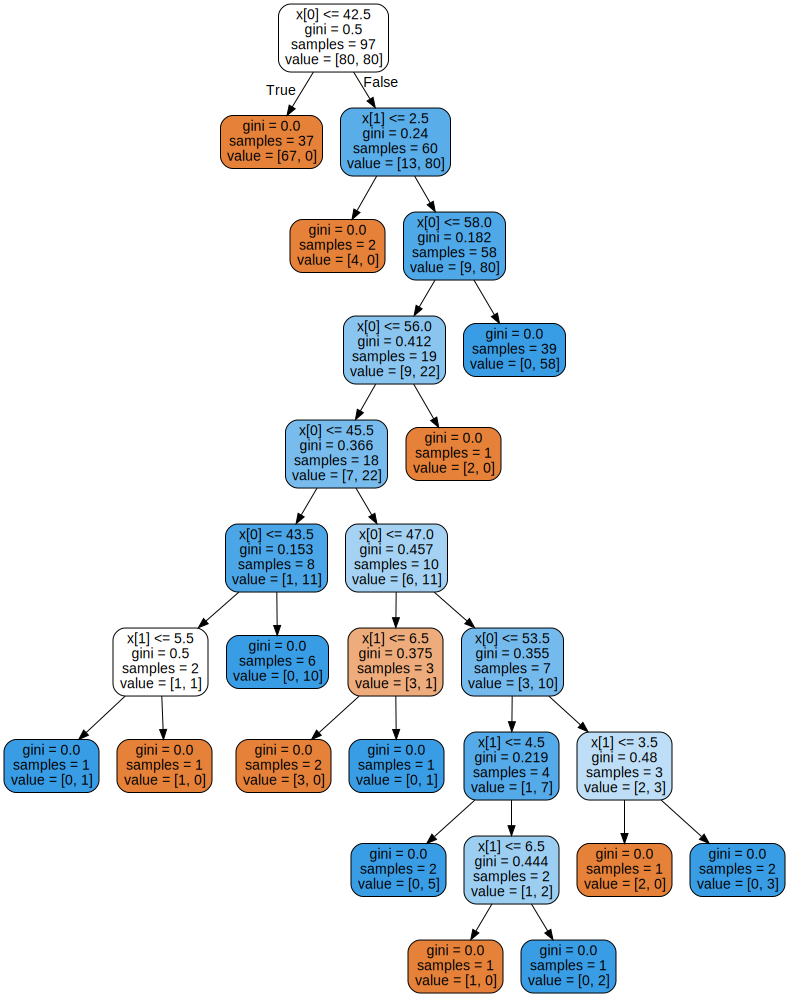

In [ ]:
tree_data=clf.estimators_[2] # третье дерево

from sklearn import tree
import graphviz
gr_data = tree.export_graphviz(tree_data, out_file=None, filled=True, rounded=True)
graph = graphviz.Source(gr_data)
graph  # отображаем на экране


              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.86      0.90      0.88        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



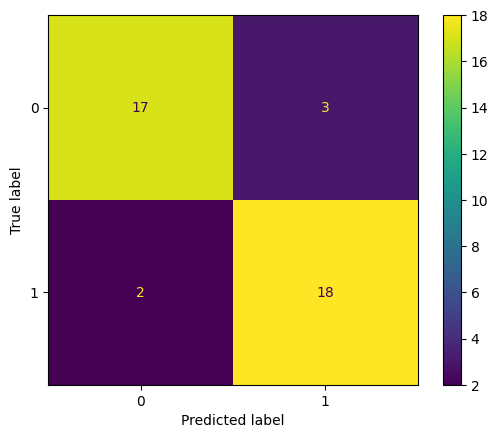

In [ ]:
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

# Ансамбли моделей (Классифиакция)

Можно выделить следующие типы ансамблей моделей:
* **"Беггинг"** (Bagging, сокращение от  Bootstrap Aggregation) - модели одного типа обучаются независимо, результаты их объединяются путем голосования и выбора по большинству голосов для классификации или усреднением для регрессии. Чтобы не обучились одинаковые модели, используют подмножества данных, случайно выбранные из общего набора, выбор происходит равномерно с повторениями (bootstrap), поэтому каждый пример данных отбирается равновероятно и может оказаться в нескольких таких подмножествах.
* **"Бустинг"** (Boosting) - модели обучаются последовательно, каждая следующая пытается скомпенсировать ошибки предыдущей, а затем результаты всех моделей объединяются.
* **"Стэкинг"** (Stacking) - модели (лучше разнообразные) обучаются независимо, затем на их результатах обучается еще одна модель, которая принимает решения.

*Рассмотрим ансамбли на примере задачи классификации.*

## Беггинг (Bagging)
Использует несколько методов или моделей в ML может обесепечить большее значние метрики исследования, чем при использовании одного метода.


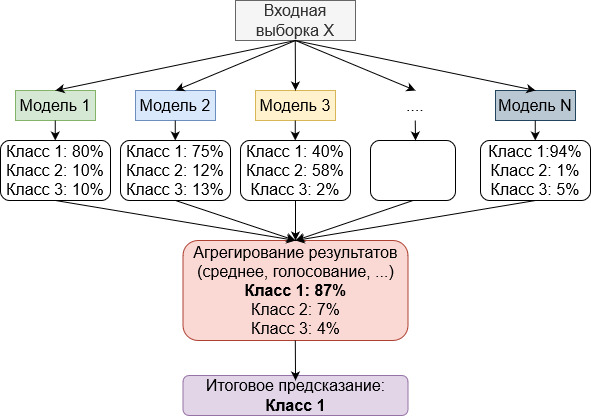

Следует учесть:
*   Необходимо разнообразие моделей в ансамбле.
*   "Эфективные" методы улучшают результаты ансамбля. «Неэфективные» методы делают ансамбль слабее, могут «усреднить» результаты "Эфективных" методов.


### Бутсрэп (Bootstrap)

Суть: выделять из всей выборки случайные наборы примеров, каждый набор передавать в одну модель. Выделенные наборы могут пересекаться


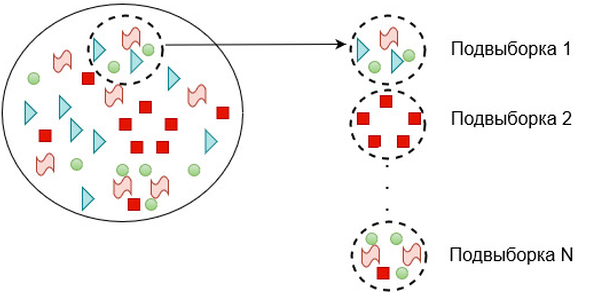

**Случайный лес $-$ это беггинг деревьев. Использование бутсрэепа позволяет создавать разные деревья (обученные на разных подвыборках).**

Функция бутстрэпа для генерации подвыборок:

In [ ]:
def get_bootstrap_samples(data, n_samples, n_data):
    # Выбираем случайно n_samples выборок по n_data индексов данных из data (с повторением в разных подвыборках)
    indices = np.random.randint(0, len(data), (n_samples, n_data))
    # Отбираем по этим индексам данные
    samples = data[indices]
    return samples # возвращаем

Бэггинг может уменьшить *дисперсию (разброс, variance)* результатов обучаемых моделей. Для этого модели должны ошибаться независимо друг от друга: одна в минус, другая в плюс, тогда усреднение может обеспечить требуемый результат.
Последнее возможно, если модели независимы, иначе модели делают общую ошибку, и беггинг не поможет.

В в модуле `ensemble` из `sklearn` есть реализация беггинга [`BaggingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) в задачах регрессии и [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) в задачах классификации.

Аргументы:

* `estimator` - метод для построения моделей. По умолчанию `None`, что равносильно `DecisionTreeClassifier`.
* `n_estimators` - количество моделей в ансамбле, по умолчанию 10.
* `max_samples` - число или доля примеров в подвыборке для тренировки каждой модели, по умолчанию 1.0        
* `max_features` - число или доля признаков в подвыборке каждой модели, по умолчанию 1.0
* `bootstrap` - применять ли бутстреп к выборке, по умолчанию True
* `bootstrap_features` - применять ли бутстреп к признакам, по умолчанию False
* `oob_score` - разрешить ли использование примеров не вошедших в подвыборку (oob = out of bag) для оценки ошибки модели (только с `bootstrap=True`), по умолчанию False
* и другие.

Создаваемый объект - классификатор или регрессор - имеет следующие поля:

* `base_estimator_` - тип моделей в ансамбле
* `estimators_` - список обученных моделей
* `estimators_samples_` - список подвыборок для обученных моделей
* `n_features_` - число признаков после обучения
* `estimators_features_` - список признаков для обученных моделей

Для регрессоров:

* `oob_prediction_` - массив результатов (выходов) регрессора  для oob примеров. Может быть `NaN`, если пример был во всех подвыборках.

Для классификаторов:

* `classes_` - массив меток классов
* `n_classes_` - количество классов
* `oob_decision_function_` - массив результатов классификации на oob примерах размера(n_samples, n_classes), может быть `NaN`, если пример был во всех подвыборках.

### Задача "ирисы Фишера"

In [12]:
from sklearn.ensemble import BaggingClassifier # Беггинг
from sklearn.tree import DecisionTreeClassifier # Уже импортировано

In [13]:
# Получаем обучающую и тестовую выборки
x, y, x_train, x_test, y_train, y_test = get_iris()

NameError: name 'get_iris' is not defined

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



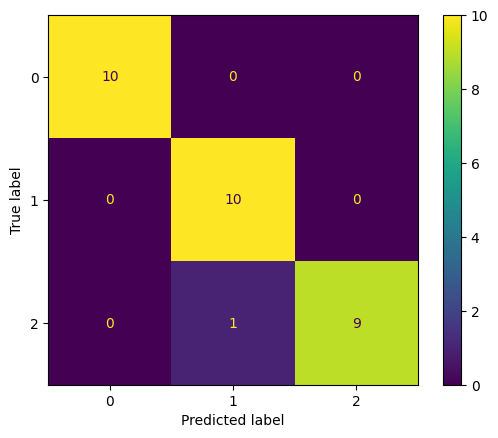

In [ ]:
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_samples=0.5)
clf.fit(x_train, y_train) # Обучаем
y_pred = clf.predict(x_test) # Тестируем

get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

## Бустинг (Boosting)

### Adaboost (Adaptive Boosting)

Идея Adaboost:
* при обучении модели используем функцию ошибки, при этом каждому обучающему примеру назначен вес $w$ для указания важности ошибки $e$ на конкретном примере. Маленький вес $-$ ошибка почти не важна, большой вес $-$ ошибка на примере обеспечивает большую общую ошибку, которая находится по формуле:

$ E=\sum_i w_i*e_i , w_i \geq 0, \sum_i w_i = 1$

* Установим все веса обучающих примеров одинаковыми (1/N, де N - количество примеров) и обучим модель.
* Для примеров с большой ошибкой сделаем веса больше, для примеров с ошибкой поменьше $-$ веса уменьшим (при этом сумма всех весов = 1).
* На тех же примерах обучим новую модель, но с весами с предыдущего шага. Повторим предыдущий шаг для новой модели.
* Будем обучать новые модели на тех же примерах с новыми весами, пока не достигнем условия остановки обучения.
* В результате получим много обученных моделей, а выход найдем путем взвешенного усреднения результатов каждой модели.


В `sklearn` в модуле `ensemble` метод реализованы [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) для классификации и [`AdaBoostRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor) для регрессии.

Аргументы:  
- `stimator` — базовый алгоритм модели в ансамбле. По умолчанию  `sklearn.tree.DecisionTreeClassifier(max_depth=1)`.
- `n_estimators` — наибольшее допустимое количество моделей в ансамбле.
- `learning_rate` — вклад каждой модели в изменение весовых коэффициентов, по умолчанию равно 1. Уменьшение згначения параметра прведет к тому, что весовые коэффициенты будут изменяться в меньшей степени, модель дольше обучаться (но может увеличиться качество обучения).
- и другие.

Атрибуты:
* `estimator_` - тип моделей в ансамбле.
* `estimators_` - список моделей ансамбля.
* `estimator_weights_`-  вес каждой модели в ансамбле
* `feature_importances_` - важность признаков

у классификатора есть еще
* `classes_` - метки классов
* `n_classes_` - число классов

Методы:
* Стандартные `fit()`, `predict()`, `predict_proba()`, ...
* специфичные
  * `staged_predict(self, X)` - вычисляет выходы каждой модели ансамбля
  * `staged_score(self, X, y[, sample_weight])` - вычисляет ошибки для каждой модели ансамбля.
  * др.


#### Adaboost для классификации. Ирисы Фишера.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



/Users/szime/git/study/python/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


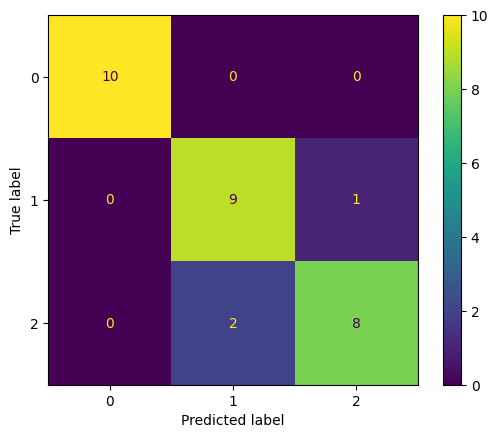

In [33]:
# Получаем обучающую и тестовую выборки
x, y, x_train, x_test, y_train, y_test = get_iris()

from sklearn.ensemble import AdaBoostClassifier # подключим модуль Adaboost

# Cоздадим и обучим Adaboost классификатор (на основе деревьев)
clf = AdaBoostClassifier(n_estimators=30, learning_rate=1)
clf = clf.fit(x_train, y_train)

# Тест:
y_pred = clf.predict(x_test)
# Метрики:
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)


### Градиентный бустинг. Xgboost

Идея:
* На входных данных **X** и указания учителя **Y** обучим модель. Если модель простая и плохо обучится, то выход модели будет **Y1** (должны были получить **Y**).
* На этих же данных обучим вторую модель, пусть теперь указания учителя **Y-Y1**, а получим выход **Y2** (тоже не **Y-Y1**).
* Обучим третью модель с указаниями учителя **Y-Y2**, получим выход **Y3**.
* Продолжаем обучение новых моделей, пока не достигнем критериев остановки.
* Результат ансамбля, выход = $Y1 + Y2 + Y3 + ...$

Величина **(Y - Y1)** это градиент по **Y1** от средневквадратичной ошибки $0.5*(Y-Y1)^2$, поэтому ввели термин ["градиентный бустинг"](https://en.wikipedia.org/wiki/Gradient_boosting), величины (Y - Yi) - "остатками" (residuals).

Процесс аналогичен, даже если функция ошибки не среднеквадратичная.

Для улучшения можно обучать новые модели не на том же наборе данных, а используя бутсрап.

В `sklearn` для градиентного бустинга деревьев есть [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)  и
[`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor), также существует его известная реализация [**xgboost**](https://xgboost.readthedocs.io/en/latest/parameter.html), в  [`XGBClassifier`](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier) и [`XGBRegressor`](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbregressor#xgboost.XGBRegressor) реализован бустинг деревьев и линейных моделей.

**xgboost** поддерживает распаралеливание вычислений
.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



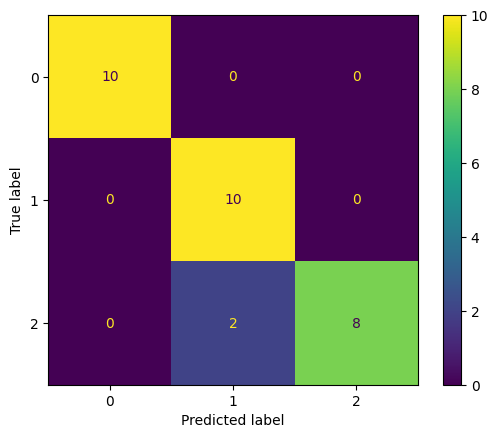

In [ ]:
# Получаем обучающую и тестовую выборки
x, y, x_train, x_test, y_train, y_test = get_iris()


import xgboost # подключим библиотеку XGboost

# Cоздадим и обучим Adaboost классификатор (на основе деревьев)
clf = xgboost.XGBClassifier() # создаем объект
clf.fit(x_train, y_train) # обучаем его
# проверим на тесте
y_pred = clf.predict(x_test)
# посчитаем метрики
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

### Градиентный бустинг. Catboost

Еще одна популярная библиотека Catboost (categorical boosting) для градиентного бустинга деревьев. Позволяет работать с категориальными признаками без предобработок, библиотека сама их делает.

Библиотеку надо установить, например с помощью:

In [34]:
!pip install catboost

In [35]:
# Импорт инструмента для работы с данными Pool и классификатора
from catboost import Pool, CatBoostClassifier


In [ ]:
# Данные для обучения - одна категориальная (в браке или нет) и две вещественные переменные (количество лет и заработная плата)
train_data = [["in marriage", 55, 100],
              ["in marriage", 30, 57],
              ["not married", 30, 7],
              ["not married", 20, 204]]
# данные для теста
test_data = [["not married", 21, 177],
             ["not married", 17, 9],
             ["in marriage", 50, 110],
             ["in marriage", 58, 88],
             ]

cat_features = [0] # Номера категориальных переменных

# Указания учителя:
train_label = ["safe",  "safe", "not_safe", "not_safe"] # Обучение
test_label = ["not_safe", "not_safe", "safe", "safe" ] # Тест

# Обучающий набор данных
train_dataset = Pool(data=train_data, # сами данные
                     label=train_label, # указания учителя
                     cat_features=cat_features) # индексы категориальных переменных

# Тестовые данные
test_dataset = Pool(data=test_data,
                    label=test_label,
                    cat_features=cat_features)

# Создаем модель CatBoostClassifier
clf = CatBoostClassifier(iterations=10, # число моделей в ансамбле
                           learning_rate=1, # шаг обучения
                           depth=2, # глубина дерева
                           loss_function='MultiClass') # вид функции ошибки

clf.fit(train_dataset)
preds_class = clf.predict(test_dataset)
# Вероятности классов:
preds_proba = clf.predict_proba(test_dataset)
preds_class

0:	learn: 0.6268034	total: 46.4ms	remaining: 418ms
1:	learn: 0.4740772	total: 47.3ms	remaining: 189ms
2:	learn: 0.3970714	total: 47.9ms	remaining: 112ms
3:	learn: 0.3163695	total: 48.4ms	remaining: 72.5ms
4:	learn: 0.2609767	total: 48.9ms	remaining: 48.9ms
5:	learn: 0.2092509	total: 49.5ms	remaining: 33ms
6:	learn: 0.1729892	total: 49.8ms	remaining: 21.4ms
7:	learn: 0.1465093	total: 50.2ms	remaining: 12.5ms
8:	learn: 0.1265073	total: 50.5ms	remaining: 5.62ms
9:	learn: 0.1109670	total: 50.9ms	remaining: 0us


array([['not_safe'],
       ['not_safe'],
       ['safe'],
       ['safe']], dtype=object)

0:	learn: 0.2301759	total: 59.8ms	remaining: 538ms
1:	learn: 0.1475394	total: 60.1ms	remaining: 240ms
2:	learn: 0.1101792	total: 60.2ms	remaining: 140ms
3:	learn: 0.0977039	total: 60.3ms	remaining: 90.4ms
4:	learn: 0.0791863	total: 60.4ms	remaining: 60.4ms
5:	learn: 0.0675274	total: 60.5ms	remaining: 40.3ms
6:	learn: 0.0643002	total: 60.5ms	remaining: 25.9ms
7:	learn: 0.0594740	total: 60.6ms	remaining: 15.1ms
8:	learn: 0.0466506	total: 60.7ms	remaining: 6.74ms
9:	learn: 0.0451673	total: 60.8ms	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



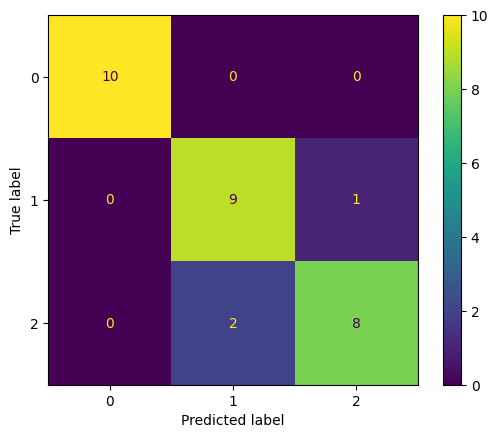

In [37]:
# Получаем обучающую и тестовую выборки
x, y, x_train, x_test, y_train, y_test = get_iris()


# Cоздадим и обучим Adaboost классификатор (на основе деревьев)
clf = CatBoostClassifier(iterations=10, # число моделей в ансамбле
                           learning_rate=1, # шаг обучения
                           depth=2, # глубина дерева
                           loss_function='MultiClass') # вид функции ошибки

clf.fit(x_train, y_train) # Обучение

y_pred = clf.predict(x_test)  # Тест

# Найдем значения метрик:
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

### Градиентный бустинг. LightGBM. (Классифиакция)

[LightGBM](https://lightgbm.readthedocs.io/en/latest/) $-$ библиотека с эффективной реализацией алгоритма градиентного бустинга.
Применим в задачах регрессии и классификации.


In [36]:
import lightgbm as lgb  # Имполрт библиотеки

OSError: dlopen(/Users/szime/git/study/python/.venv/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib
  Referenced from: <D3923ACB-D836-32D3-A031-CF91999FDAFC> /Users/szime/git/study/python/.venv/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.dylib
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file)

**Рассмотрим классификатор**

Некоторые аргументы **lgb.LGBMClassifier()**:

* `boosting_type` — по умолчанию 'gbdt',
  * 'gbdt' — дерево решений с градиеным бустингом.
  * 'dart' — использование dropout в алгоритме множественных аддитивных регрессионных деревьев (MART).
  * 'rf', Случайный лес.
* `max_depth` — число, наибольшая допустимая глубина деревьев, если <=0, то глубина не ограничена, по умолчанию -1.
* `n_estimators` — количество деревьев, по умолчанию 100
* `objective` — по умолчанию `None`, что соответствует `regression`
  * 'regression' для `LGBMRegressor`,
  * 'binary' или 'multiclass' для бинарной илди многоклассовой классификации `LGBMClassifier`,
  * 'lambdarank' для ранжирования `LGBMRanker`.
* `n_jobs` —  количество паралельных ветвей вычислений, для ускорения вычислений рекомендуется ставить равным количеству ядер ЦПУ, -1 означает использования всех ядер  


In [ ]:
# Получаем обучающую и тестовую выборки
x, y, x_train, x_test, y_train, y_test = get_iris()

clf = lgb.LGBMClassifier(objective="multiclass", n_estimators=10)  # Создание модели
clf.fit(x_train, y_train)  # Обучение
y_pred = clf.predict(x_test) # Предсказание классов тестовых данных

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



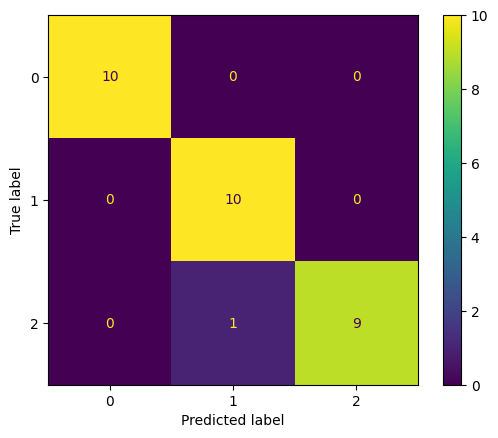

In [ ]:
# Найдем значения метрик:
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

## Стекинг

В `sklearn` реализованы
* [`StackingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier)  - классификатор
* [`StackingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor) - регрессор

Аргументы для создания ансамблей:
* `estimators` - список моделей или кортеж из названий и объектов моделей ансамбля
* `final_estimator` - модель для объединения результатов и принятия решщения, по умолчанию `LogisticRegression` (классификауия) и `RidgeCV` (регрессия).
* `cv` - число разбиений (фолдов) для кроссвалидации
* `stack_method` - указывает на результат, по которому объединять модели:
  * 'predict_proba'  - возвращает вероятности принадлежности примера каждому классу,
  * 'decision_function' - Функция принятия решения для выборок с использованием окончательной оценки.
  * 'predict' - возвращает метки классов объектов,
   * 'auto' - попытается вызвать для каждого оценщика в таком порядке:  'predict_proba', 'decision_function', 'predict'.
* `n_joobs` - количество параллельно запущенных задач.
* `verbose` - число, подробность вывода информацию при обучении, по умолчанию 0 - не выводить
* `passthrough`:
  * `False` - для обучения финальной модели использовать только результаты моделей ансамбля.
  * `True` - для обучения финальной модели использовать результаты моделей ансамбля и сами входные данные.

Атрибуты:

* `classes_` - метки классов
* `estimators_` - набор обученных моделей и их параметры в ансамбле
* `final_estimator_` - обученная финальная модель
* `named_estimators_` - параметры моделей

Поддерживает стандартные методы: `fit()`, `pedict()`, `pedict_proba()`, ...

Также достпупны [`VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) и [`VotingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor), у которых вмсето применения финальной модели, решение принимается путем голосования.



Иногда ML моделям требуются нормализованные данные, получим их с помощью [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) из `sklearn`.

In [ ]:
# Получаем обучающую и тестовую выборки
x, y, x_train, x_test, y_train, y_test = get_iris()

# Нормализуем данные
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Обучим и протестируем модель:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



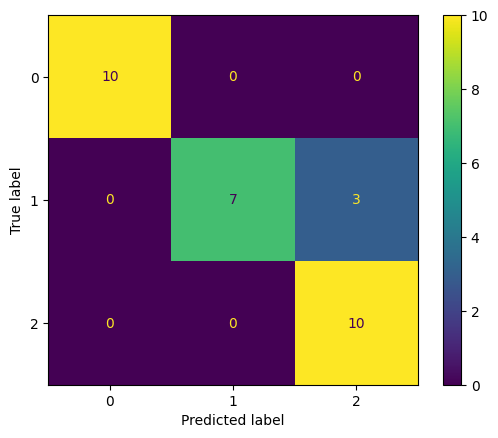

In [ ]:
from sklearn.ensemble import StackingClassifier

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

estimators = [('LinearSVC', LinearSVC(dual=True)),
              ('LogReg', LogisticRegression()),
              ('Tree', DecisionTreeClassifier(max_depth=5))]

clf = StackingClassifier(estimators=estimators)
clf.fit(x_train, y_train)  # Обучение
y_pred = clf.predict(x_test) # Предсказание классов тестовых данных

# Найдем значения метрик:
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

In [ ]:
clf.estimators_

[LinearSVC(dual=True),
 LogisticRegression(),
 DecisionTreeClassifier(max_depth=5)]

In [ ]:
clf.named_estimators_

{'LinearSVC': LinearSVC(dual=True),
 'LogReg': LogisticRegression(),
 'Tree': DecisionTreeClassifier(max_depth=5)}

In [ ]:
clf.final_estimator_

LogisticRegression()

In [ ]:
clf.classes_

array([0, 1, 2])

# Пример сравнения трёх методов классифиакции

Log_reg f1= 0.43
Дерево решений f1= 0.78
Случайный лес f1= 0.81


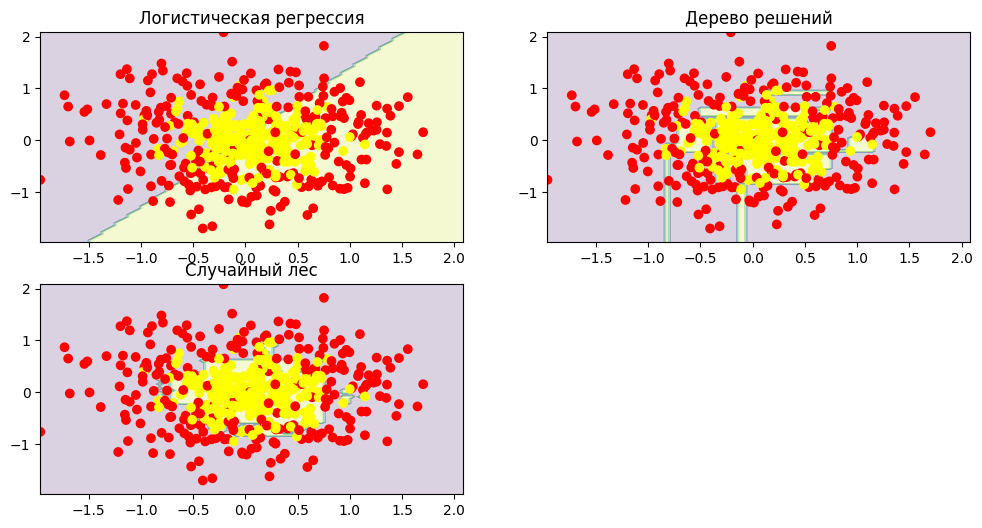

In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Генерация 2-х классов (class=0 или 1) кругов со случайными центрами
from sklearn.datasets import make_circles

plt.rcParams['figure.figsize'] = 12, 6
fig = plt.figure()  # Инициализируем объект Figure

# Сгенерируем датасет с кругами
# X - координаты центров кругов, y={0;1} - метки классов -> бинарная классификция
# Тренировочная выборка:
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)
# Получаем сетку для отрисовки разделяющей гиперплоскости
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)  # xx1.shape=(100,100),  xx2.shape=(100,100)


# Метод 1: Логистическая регрессия
Log_reg = linear_model.LogisticRegression(C=10**5, max_iter=100)
Log_reg.fit(X_train_circles, y_train_circles)

y_all_p = Log_reg.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_all_p = y_all_p.reshape(xx1.shape)
plt.subplot(2, 2, 1)
plt.contourf(xx1, xx2, y_all_p, alpha=0.2)  # Разделяющая поверхность
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Логистическая регрессия")

# Посчитаем f1
y_pred_circles = Log_reg.predict(X_test_circles)
print('Log_reg f1=', round(f1_score(y_test_circles, y_pred_circles, average="macro"),2))



# Метод 2: Дерево решений
dtree = DecisionTreeClassifier(random_state=42, max_depth=10)
dtree.fit(X_train_circles, y_train_circles)

# Классифицируем круги
y_all_p = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])  # y_hat.shape = 10000
y_all_p = y_all_p.reshape(xx1.shape)  # y_hat.shape = (100, 100)

# Отрисовка кругов
plt.subplot(2, 2, 2)
plt.contourf(xx1, xx2, y_all_p, alpha=0.2)  # Отрисовать область, разграничивающую два класса
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')  # Отрисовать круги
plt.title("Дерево решений")

# Посчитаем f1
y_pred_circles = dtree.predict(X_test_circles)
print('Дерево решений f1=', round(f1_score(y_test_circles, y_pred_circles, average="macro"),2))

# Метод 3: Случайный лес
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)
y_all_p = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_all_p= y_all_p.reshape(xx1.shape)

plt.subplot(2, 2, 3)
plt.contourf(xx1, xx2, y_all_p, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Случайный лес")


# Посчитаем f1
y_pred_circles = rf.predict(X_test_circles)
print('Случайный лес f1=', round(f1_score(y_test_circles, y_pred_circles, average="macro"),2))

plt.show()




# Кластеризация. Метод k-средних



Задача кластеризации состоит в том, чтобы из общего множества сгруппировать подмножества (кластеры) объектов так, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по заданному критерию.

Пусть необходимо набор из n=8 точек (A1, A2, A3, A4, A5, A6, A7, A8), которые на рисунке обозначены кругами, разделить на два кластера C1 и C2 с центрами M1 и M2 соответственно. Выбираются две точки (пусть это будут точки A7(1;1) и A8(2;1)), которые будут назначены начальными центрами M1 и M2 кластеров, и на рисунке они обозначены квадратами. Для каждой точки с помощью расстояния Евклида находится ближайший центр кластера. Полученные расстояния приведены в таблице. Будем считать, что точка принадлежит тому кластеру, центру которого соответствует наименьшее расстояние от этой точки.

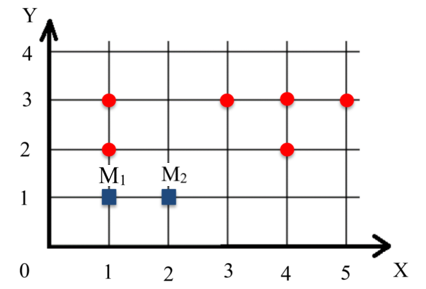

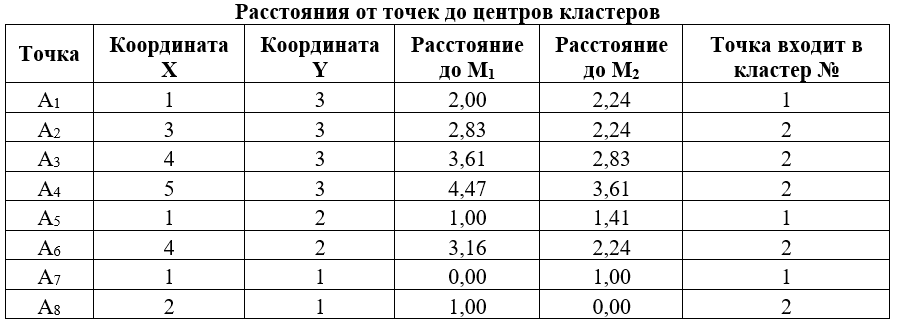

Подсчитывается сумма расстояний:

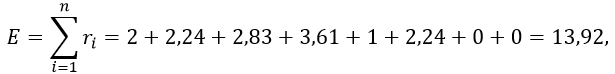

где $r_i$ (i = 1, 2, …, 8) — евклидово расстояние от точки $A_i$ до центра кластера,которому она принадлежит. Для кластеров находятся их центроиды

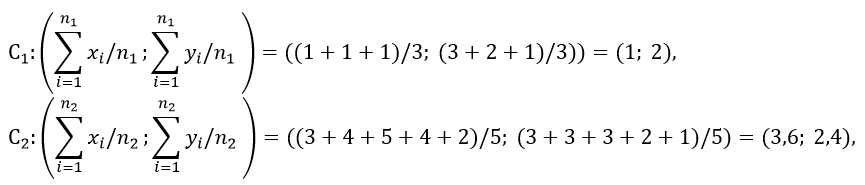

где $n_1$, $n_2$ — количество точек в кластере, $x_i$, $y_i$ — координаты точек кластера. Центры кла-стеров $M_1$ и $M_2$ кластеров перемещаются в найденные центроиды

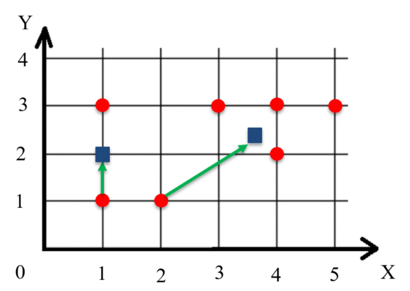

Пересчитываются расстояния от точек до центров кластеров и находится сумма E≈7,07. Уменьшение суммы указывает на улучшение разделения на кластеры. Центры кластеров вновь перемещаются в новые центроиды, подсчитывается сумма E≈6,53. Процесс подсчета ошибки и перемещения центров кластеров продолжается до тех пор, пока ошибка не перестанет значительно уменьшаться или не будет превышено заданное максимальное количество итераций.

Метод k-средних реализован в функции `cv2.kmeans(data, K, bestLabels,
criteria, attempts, flags[, centers])`, где
* `data` — массив точек np.ndarray, тип которых np.float32;
* `K` — количество кластеров;
* `bestLabels` — массив номеров кластеров для экземпляров выборки;
* `criteria` — критерий остановки кластеризации при достижении некоторого количества итераций (`cv2.TERM_CRITERIA_MAX_ITER`) и/или при достижении необходимой точности (`cv2.TERM_CRITERIA_EPS`);
* `attempts` — количество повторений алгоритма с новыми начальными классами точек;
* `flags` — флаг, указывающий начальное положение центров кластеров:
  - `cv2.KMEANS_RANDOM_CENTERS` – случайные центры кластеров,
  - `cv2.KMEANS_USE_INITIAL_LABELS` – начальное положение кластеров рассчиты-вается исходя из bestLabels;
* `centers` — матрица координат найденных центров.

Эта функция возвращает кортеж, содержащий три значения:
* `retval` — сумма расстояний от точек до центров кластеров;
* `bestLabels` — массив меток классов для каждой точки;
* `centers` — центры кластеров.


Рассмотрим задачу кластеризации на 2 класса набора точек с координатами `qp`. Координаты точек могут отражать физический смысл, например, показывать зависимость цены и качества товара или веса и роста человека.  

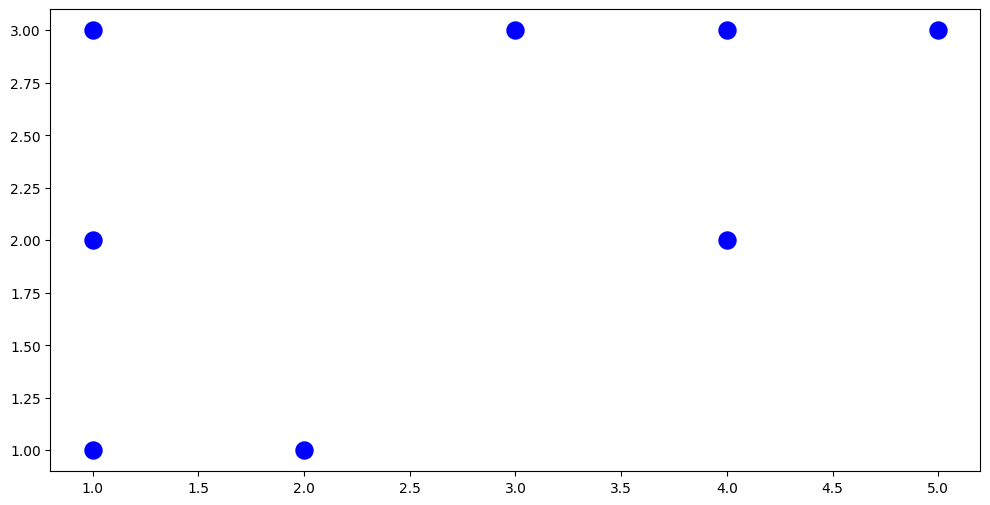

In [ ]:
qp = np.array([[1,1], [2,1], [1,2], [1,3], [3,3], [4,3], [4,2], [5,3]], dtype=np.float32) # Координаты точек
plt.scatter(qp[:,0], qp[:,1], s=150, c='b')

In [ ]:
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 5, 0.5) # Критерии остановки

_, p_class, center = cv2.kmeans(qp, 2, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS) # Кластеризация

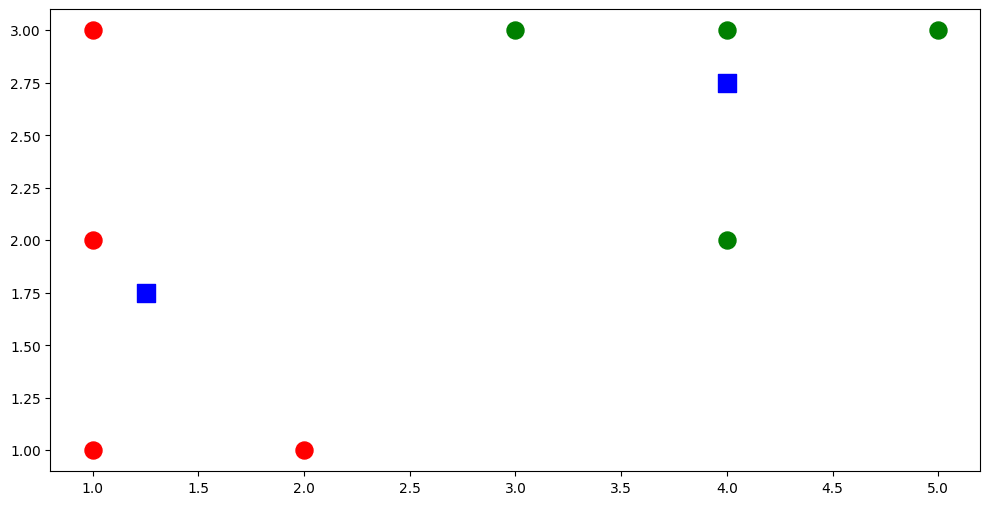

In [ ]:
# Получим экземпляры классов и отобразим их
cl1 = qp[p_class.ravel()==0] # Экземпляры класса 0
cl2 = qp[p_class.ravel()==1] # Экземпляры класса 1
plt.scatter(cl1[:,0], cl1[:,1], s=150, c='r')
plt.scatter(cl2[:,0], cl2[:,1], s=150, c='g')
plt.scatter(center[:,0], center[:,1], s=150, c='b', marker='s')
plt.show()

# Оптимизация (подбор параметров) моделей.

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

Некоторые аргументы:
* `estimator` - Метод, параметры которого настраиваем
* `param_grid` - Словарь партеров со значениями для перебора.
* `scoring` - Стратегия оценки эффективности модели с перекрестной проверкой на тестовом наборе.
* `n_jobs` - количество параллельных процессов вычислений (доступных ядер), по умолчанию `None`, что означает 1 процесс, занчение -1 означает все доступные процессы
* `refit` - Переобучить ли метод используя лучшие значения параметров, по умолчанию `True`
* `cv` - количество фолдов кросс-валидации, по умолчанию `None`, что означает 5
* `verbose` - целое число, количество выводимой информации при обучении.
* ...




In [ ]:
# Получаем обучающую и тестовую выборки
x, y, x_train, x_test, y_train, y_test = get_iris()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=False, random_state=42, n_jobs=-1, criterion='entropy')

# Задаем словарь для перебора значений парамтеров
params = {'n_estimators': [10, 50, 100]}

clf = GridSearchCV(rfc, params, scoring='f1_weighted', verbose=50, n_jobs=-1)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(bootstrap=False,
                                              criterion='entropy', n_jobs=-1,
                                              random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [10, 50, 100]},
             scoring='f1', verbose=50)

In [ ]:
# Для предсказания используем оптимальную модель
best_clf = clf.best_estimator_
print(best_clf)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=10,
                       n_jobs=-1, random_state=42)


In [ ]:
# Выведем оптимальные паарметры
best_params = clf.best_params_
print(best_params)


{'n_estimators': 10}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



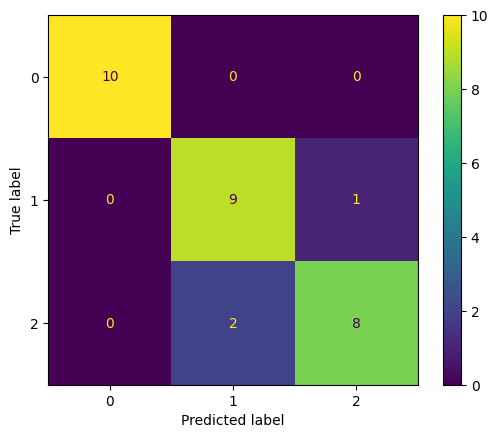

In [ ]:
# Метрики результата предсказания
y_pred = best_clf.predict(x_test)  # Выходы на тестовом наборе
# Найдем значения метрик:
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)

# Кроссвалидация (cross validation, перекресная проверка)

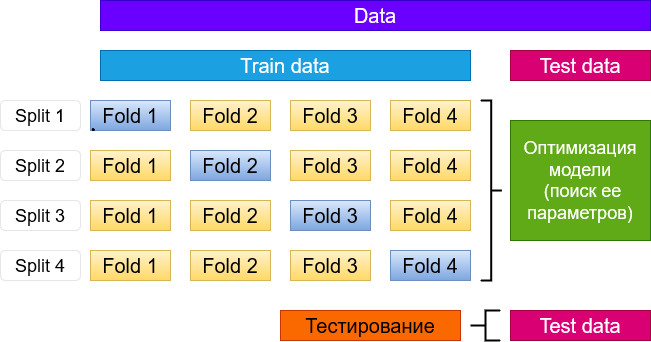

Вспомним про задачу с ирисами:

In [ ]:
x, y, x_train, x_test, y_train, y_test = get_iris()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


Протеструем модель без кросс-валидации

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC# Cлучайный лес
clf = RFC(n_estimators=150)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9111111111111111

Результаты cross_val_score $-$ метрика:

In [ ]:
from sklearn.model_selection import cross_val_score
clf = RFC(n_estimators=150, random_state=42)
scores = cross_val_score(clf, x_train, y_train, cv=4, scoring='f1_weighted')
print(scores)



[0.9628483  0.96126856 0.96141939 0.92254274]


Результаты cross_validate $-$ время на обучение, время на тестирование, метрика.

In [ ]:
from sklearn.model_selection import  cross_validate
clf = RFC(n_estimators=150, random_state=42)
scores = cross_validate(clf, x_train, y_train, cv=4, scoring = 'f1_weighted')
print(scores)


{'fit_time': array([1.07913852, 1.03615212, 1.70586634, 0.56912279]), 'score_time': array([0.04785562, 0.11890221, 0.06646562, 0.05698848]), 'test_score': array([0.9628483 , 0.96126856, 0.96141939, 0.92254274])}


Кроссвалидацию можно использовать, в том числе, в `GridSearchCV`

Fitting 4 folds for each of 3 candidates, totalling 12 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



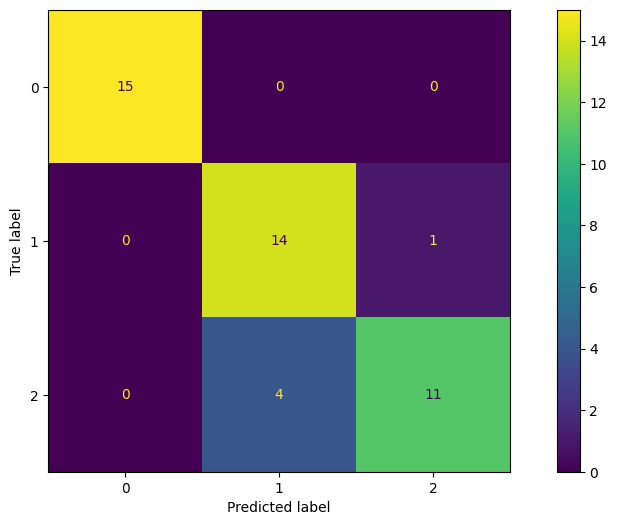

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42, n_jobs=-1, criterion='entropy')

# Задаем словарь для перебора значений парамтеров
params = {'n_estimators': [10, 20, 30]}

clf = GridSearchCV(rfc, params, scoring='f1_weighted', verbose=50, n_jobs=-1, cv=4)
clf.fit(x_train, y_train)

# Метрики результата предсказания
y_pred = clf.best_estimator_.predict(x_test)  # Выходы на тестовом наборе

# Найдем значения метрик:
get_metrics_plot_confusion_matrix(clf, y_test, y_pred)